<a href="https://colab.research.google.com/github/DanTheStrongworded/Analytics-Projects/blob/main/Product_Sales_Analytics_for_Online_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount("/content/drive")
%cd /content/drive/MyDrive/Mate_homework
events = pd.read_csv("events.csv")
products = pd.read_csv("products.csv")
countries = pd.read_csv("countries.csv")

Mounted at /content/drive
/content/drive/MyDrive/Mate_homework


#**Data Cleaning**

In [ ]:
missed_events = events.isna().sum() / events.shape[0] *100
missed_products = products.isna().sum()
missed_countries = countries.isna().sum()
print(f"Events: \n{missed_events}")
print(f"Products: \n{missed_products}")
print(f"Countries: \n{missed_countries}")

Events: 
Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      6.165414
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64
Products: 
id           0
item_type    0
dtype: int64
Countries: 
name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64


6.17% of missed values in the Country Code column and 0.15% in the Units Sold column are placed in the events dataset. Let's see whether their deletion provokes any extreme changes.

In [ ]:
events.describe()

,Order ID,Product ID,Units Sold,Unit Price,Unit Cost
count,1.330000e+03,1330.000000,1328.000000,1330.000000,1330.000000
mean,5.412048e+08,5788.096241,4952.201807,264.893541,187.246812
std,2.573882e+08,2820.728878,2905.198996,217.323460,176.158873
min,1.006406e+08,1270.000000,2.000000,9.330000,6.920000
25%,3.190004e+08,3127.000000,2356.750000,81.730000,35.840000
50%,5.387164e+08,5988.000000,4962.000000,154.060000,97.440000
75%,7.544628e+08,8681.000000,7459.500000,437.200000,263.330000
max,9.998797e+08,8969.000000,9999.000000,668.270000,524.960000


In [ ]:
dropped_events = events.dropna(subset=["Country Code", "Units Sold"])
dropped_events.describe()

,Order ID,Product ID,Units Sold,Unit Price,Unit Cost
count,1.246000e+03,1246.000000,1246.000000,1246.000000,1246.000000
mean,5.432231e+08,5756.146067,4953.186998,264.203387,186.310088
std,2.573524e+08,2827.558739,2915.825155,216.592937,175.503652
min,1.006406e+08,1270.000000,2.000000,9.330000,6.920000
25%,3.237987e+08,2455.000000,2349.250000,81.730000,35.840000
50%,5.438407e+08,5988.000000,4980.000000,154.060000,97.440000
75%,7.539619e+08,8293.000000,7477.000000,433.372500,263.330000
max,9.998797e+08,8969.000000,9999.000000,668.270000,524.960000


Changes are not radical, that's why we can omit the missed values.

In [ ]:
print(f"Events: \n{dropped_events.info()}")
print(f"Countries: \n{countries.info()}")
print(f"Products: \n{countries.info()}")

<class 'pandas.core.frame.DataFrame'>
Index: 1246 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1246 non-null   int64  
 1   Order Date      1246 non-null   object 
 2   Ship Date       1246 non-null   object 
 3   Order Priority  1246 non-null   object 
 4   Country Code    1246 non-null   object 
 5   Product ID      1246 non-null   int64  
 6   Sales Channel   1246 non-null   object 
 7   Units Sold      1246 non-null   float64
 8   Unit Price      1246 non-null   float64
 9   Unit Cost       1246 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 107.1+ KB
Events: 
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3    

If I need any data from any column for aggregation or making plots, I will change format in the making.

In [ ]:
duplicate_rows = dropped_events.duplicated()
print(f"Number of duplicates in Events: {duplicate_rows.sum()}")

Number of duplicates in Events: 0


In [ ]:
duplicate_rows = countries.duplicated()
print(f"Number of duplicates in Countries: {duplicate_rows.sum()}")

Number of duplicates in Countries: 0


In [ ]:
duplicate_rows = products.duplicated()
print(f"Number of duplicates in Products: {duplicate_rows.sum()}")

Number of duplicates in Products: 0


#**Merging**

In [ ]:
products_events = pd.merge(dropped_events, products, left_on="Product ID", right_on="id", how="outer")
full_dataset = pd.merge(products_events, countries, left_on="Country Code", right_on="alpha-3", how="left")
full_dataset.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,id,item_type,name,alpha-2,alpha-3,region,sub-region
0,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79,1270,Beverages,Serbia,RS,SRB,Europe,Southern Europe
1,121945512,4/8/2017,4/12/2017,C,GBR,1270,Online,5242.0,47.45,31.79,1270,Beverages,United Kingdom,GB,GBR,Europe,Northern Europe
2,122144210,4/27/2017,5/24/2017,C,MNE,1270,Offline,4041.0,47.45,31.79,1270,Beverages,Montenegro,ME,MNE,Europe,Southern Europe
3,122372519,1/10/2016,1/13/2016,L,PRT,1270,Offline,1603.0,47.45,31.79,1270,Beverages,Portugal,PT,PRT,Europe,Southern Europe
4,122967326,3/24/2017,4/25/2017,H,BLR,1270,Online,7619.0,47.45,31.79,1270,Beverages,Belarus,BY,BLR,Europe,Eastern Europe


In [ ]:
dataset = (
    full_dataset
    .drop(["id", "alpha-2", "Country Code", "alpha-3"], axis=1)
    .rename(columns={"name": "Country Name"})
)
dataset.columns = dataset.columns.str.capitalize()
dataset.head()


,Order id,Order date,Ship date,Order priority,Product id,Sales channel,Units sold,Unit price,Unit cost,Item_type,Country name,Region,Sub-region
0,103435266,8/11/2012,9/18/2012,H,1270,Offline,7648.0,47.45,31.79,Beverages,Serbia,Europe,Southern Europe
1,121945512,4/8/2017,4/12/2017,C,1270,Online,5242.0,47.45,31.79,Beverages,United Kingdom,Europe,Northern Europe
2,122144210,4/27/2017,5/24/2017,C,1270,Offline,4041.0,47.45,31.79,Beverages,Montenegro,Europe,Southern Europe
3,122372519,1/10/2016,1/13/2016,L,1270,Offline,1603.0,47.45,31.79,Beverages,Portugal,Europe,Southern Europe
4,122967326,3/24/2017,4/25/2017,H,1270,Online,7619.0,47.45,31.79,Beverages,Belarus,Europe,Eastern Europe


#**Data analysis and visualization**

##**General Metrics**

In [ ]:
import pandas as pd

order_number = dataset["Order id"].value_counts().sum()
print(f"Number of orders: {order_number}")

profit = dataset["Units sold"] * (dataset["Unit price"] - dataset["Unit cost"])
print(f"General Profit: ${profit.sum().round()}")

country_number = dataset["Country name"].nunique()
print(f"Number of countries: {country_number}")

dataset["Order date"] = pd.to_datetime(dataset["Order date"])
dataset["Ship date"] = pd.to_datetime(dataset["Ship date"])
shipping_time = (dataset["Ship date"] - dataset["Order date"]).dt.days
average_shipping_time = shipping_time.mean()
print(f"Average time of shipping: {average_shipping_time:.2f} days")


Number of orders: 1246
General Profit: $473709035.0
Number of countries: 45
Average time of shipping: 24.88 days


##**Popularity and Profitability**

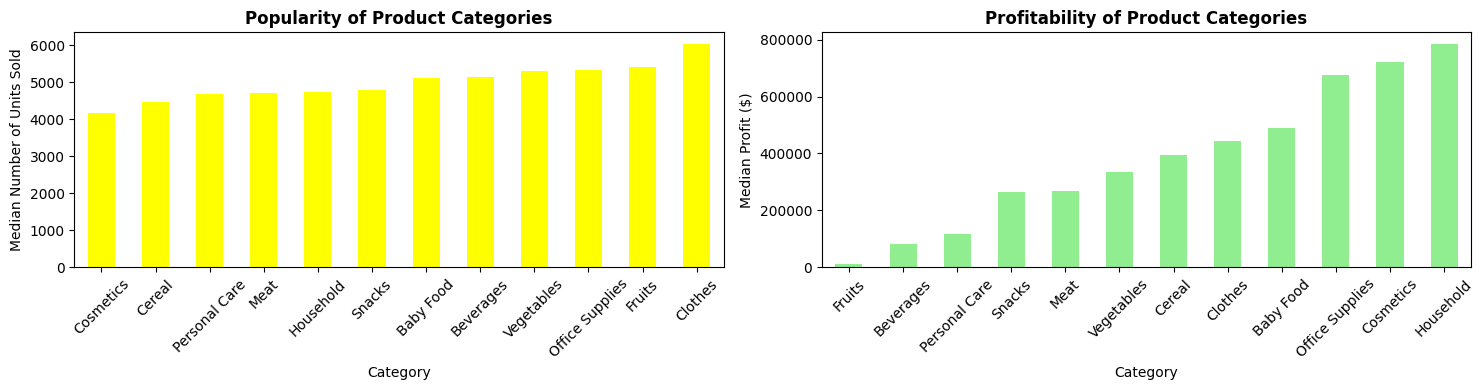

In [ ]:
import matplotlib.pyplot as plt

dataset["Profit"] = dataset["Units sold"] * (dataset["Unit price"] - dataset["Unit cost"])

fig, ax = plt.subplots(1, 2, figsize=(15, 4))

dataset.groupby("Item_type", observed=False)["Units sold"].median().sort_values().plot(kind="bar", ax=ax[0], color="yellow")
ax[0].set_title("Popularity of Product Categories", fontweight="semibold")
ax[0].set_xlabel("Category")
ax[0].set_ylabel("Median Number of Units Sold")
ax[0].tick_params(axis='x', rotation=45)

dataset.groupby("Item_type", observed=False)["Profit"].median().sort_values().plot(kind="bar", ax=ax[1], color="lightgreen")
ax[1].set_title("Profitability of Product Categories", fontweight="semibold")
ax[1].set_xlabel("Category")
ax[1].set_ylabel("Median Profit ($)")
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

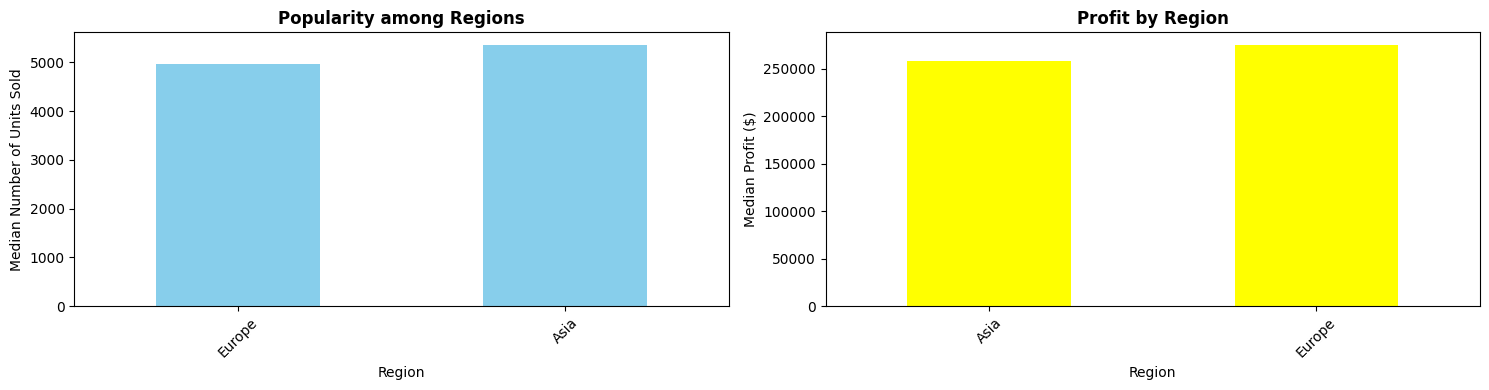

In [ ]:
dataset["Profit"] = dataset["Units sold"] * (dataset["Unit price"] - dataset["Unit cost"])

fig, ax = plt.subplots(1, 2, figsize=(15, 4))

dataset.groupby("Region", observed=False)["Units sold"].median().sort_values().plot(kind="bar", ax=ax[0], color="skyblue")
ax[0].set_title("Popularity among Regions", fontweight="semibold")
ax[0].set_xlabel("Region")
ax[0].set_ylabel("Median Number of Units Sold")
ax[0].tick_params(axis='x', rotation=45)

dataset.groupby("Region", observed=False)["Profit"].median().sort_values().plot(kind="bar", ax=ax[1], color="yellow")
ax[1].set_title("Profit by Region", fontweight="semibold")
ax[1].set_xlabel("Region")
ax[1].set_ylabel("Median Profit ($)")
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

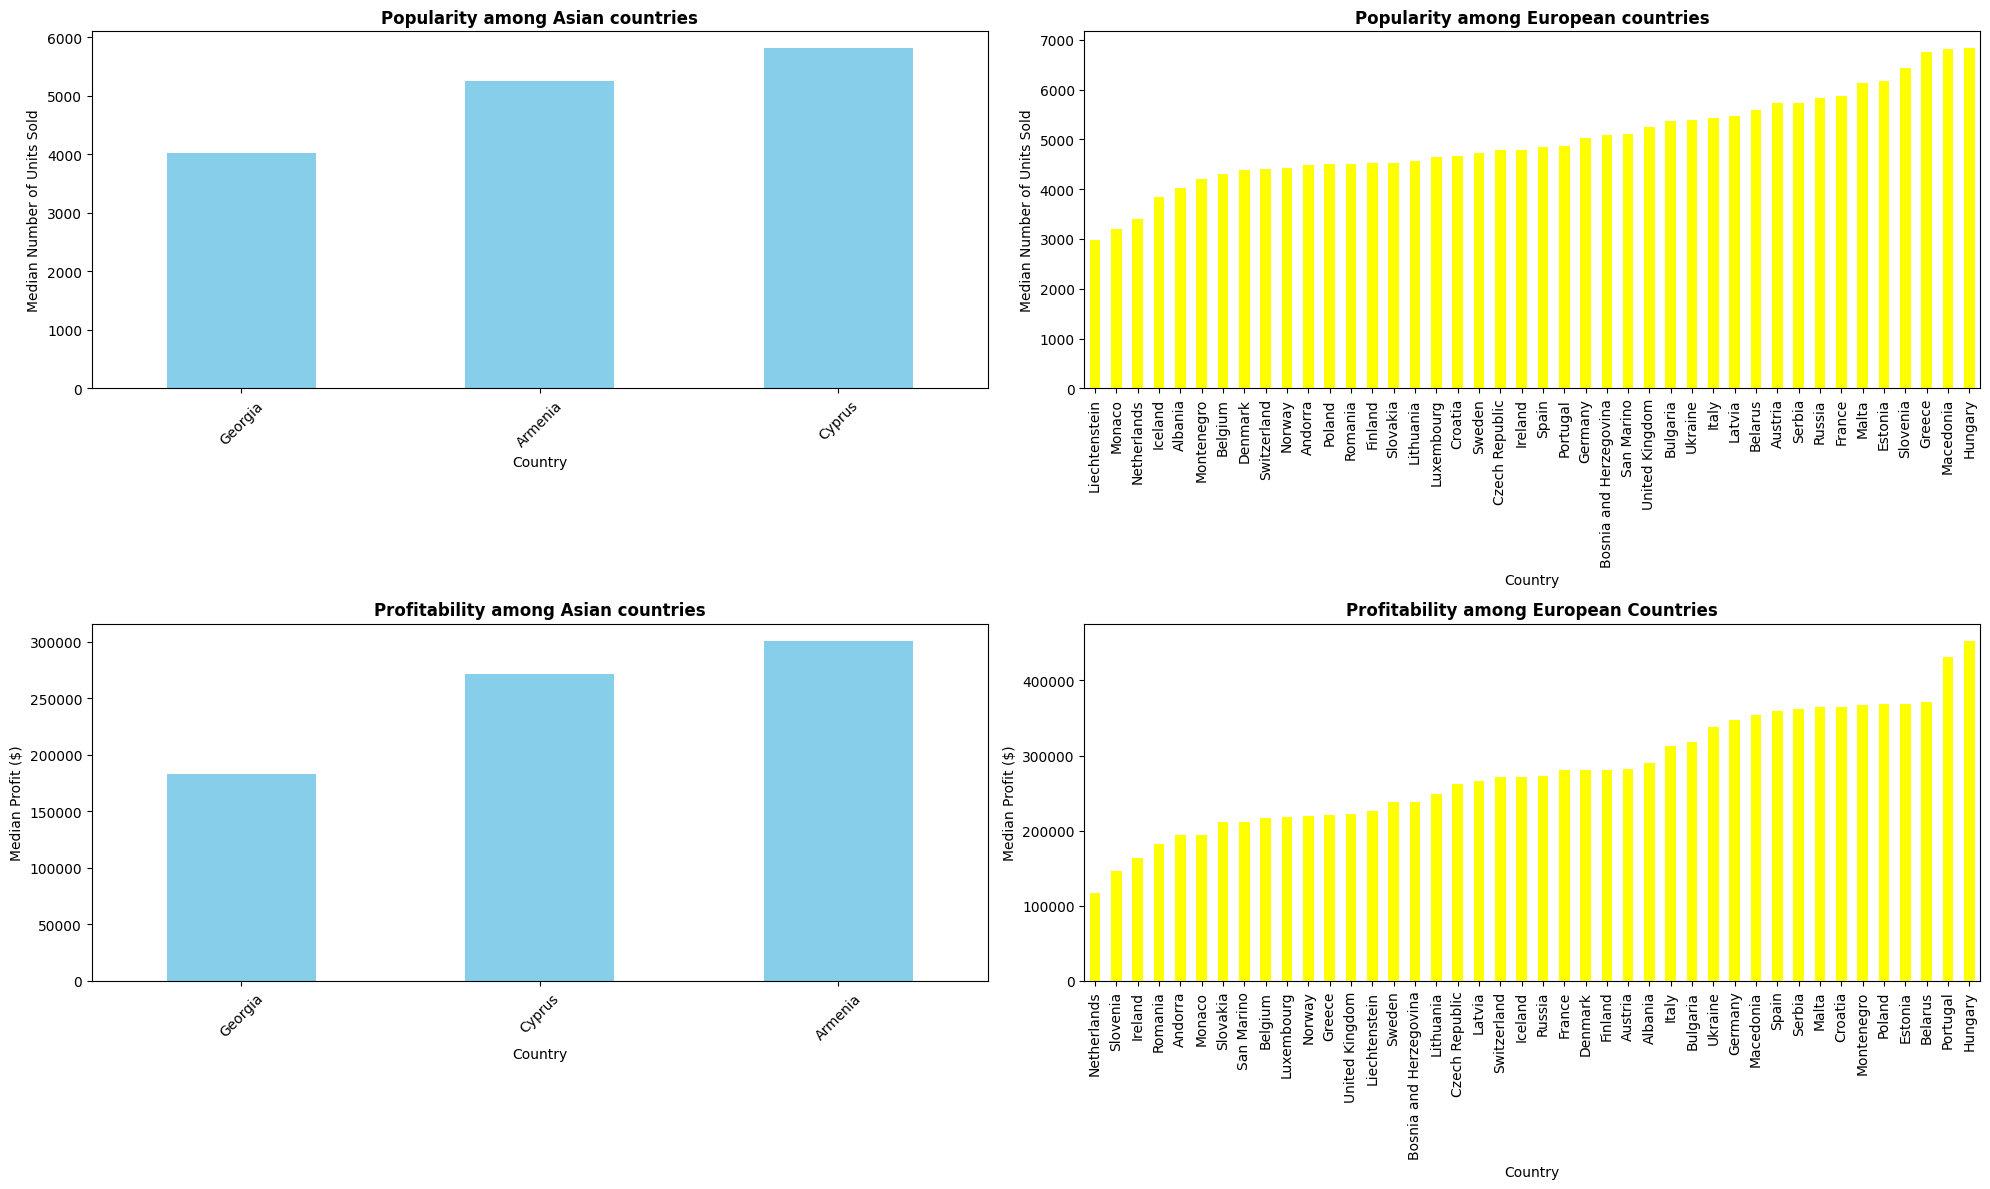

In [ ]:
dataset["Asian countries"] = dataset[dataset["Region"] == "Asia"]["Country name"]
dataset["European countries"] = dataset[dataset["Region"] == "Europe"]["Country name"]
dataset["Profit"] = dataset["Units sold"] * (dataset["Unit price"] - dataset["Unit cost"])

fig, ax = plt.subplots(2, 2, figsize=(20, 12))

dataset.groupby("Asian countries", observed=False)["Units sold"].median().sort_values().plot(kind="bar", ax=ax[0,0], color="skyblue")
ax[0,0].set_title("Popularity among Asian countries", fontweight="semibold")
ax[0,0].set_xlabel("Country")
ax[0,0].set_ylabel("Median Number of Units Sold")
ax[0,0].tick_params(axis='x', rotation=45)

dataset.groupby("European countries", observed=False)["Units sold"].median().sort_values().plot(kind="bar", ax=ax[0,1], color="yellow")
ax[0,1].set_title("Popularity among European countries", fontweight="semibold")
ax[0,1].set_xlabel("Country")
ax[0,1].set_ylabel("Median Number of Units Sold")

dataset.groupby("Asian countries", observed=False)["Profit"].median().sort_values().plot(kind="bar", ax=ax[1,0], color="skyblue")
ax[1,0].set_title("Profitability among Asian countries", fontweight="semibold")
ax[1,0].set_xlabel("Country")
ax[1,0].set_ylabel("Median Profit ($)")
ax[1,0].tick_params(axis='x', rotation=45)

dataset.groupby("European countries", observed=False)["Profit"].median().sort_values().plot(kind="bar", ax=ax[1,1], color="yellow")
ax[1,1].set_title("Profitability among European Countries", fontweight="semibold")
ax[1,1].set_xlabel("Country")
ax[1,1].set_ylabel("Median Profit ($)")

plt.tight_layout()
plt.show()

To look closer, Cyprus buys the most units among Asian countries.

Hungary is the top country in profitability.

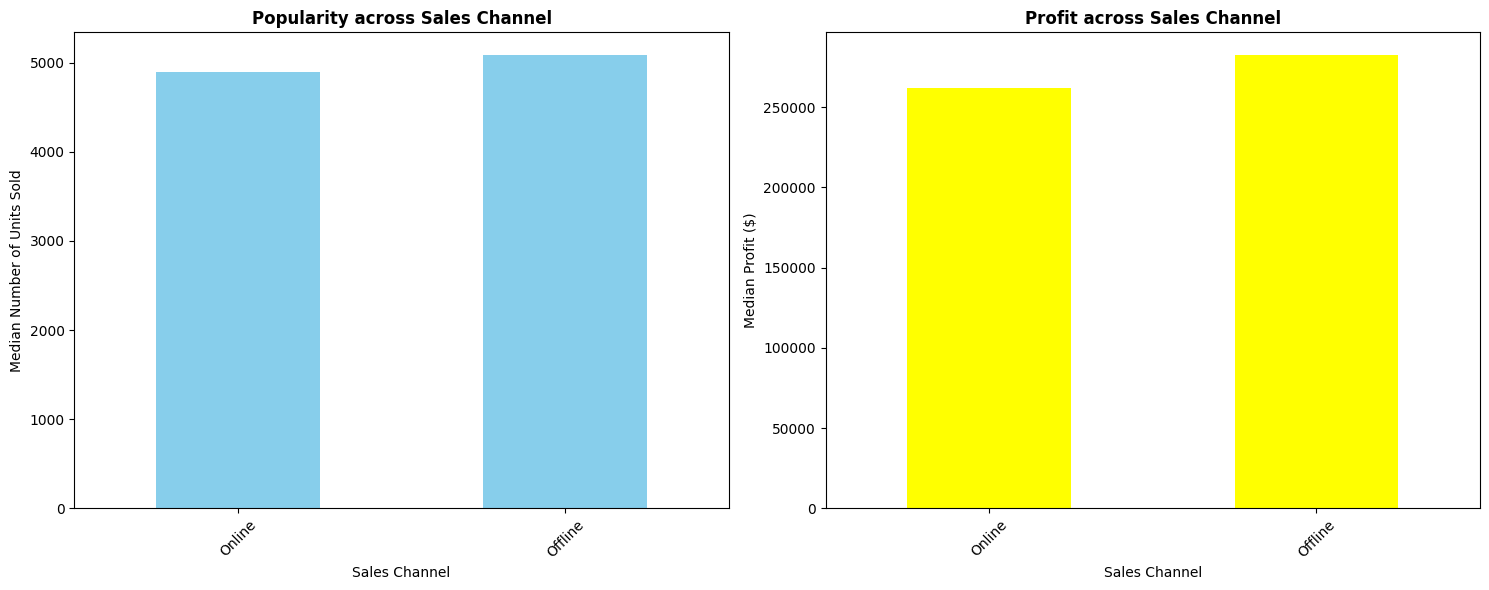

In [ ]:
dataset["Profit"] = dataset["Units sold"] * (dataset["Unit price"] - dataset["Unit cost"])
dataset["Sales channel"] = dataset["Sales channel"].str.capitalize()

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

dataset.groupby("Sales channel", observed=False)["Units sold"].median().sort_values().plot(kind="bar", ax=ax[0], color="skyblue")
ax[0].set_title("Popularity across Sales Channel", fontweight="semibold")
ax[0].set_xlabel("Sales Channel")
ax[0].set_ylabel("Median Number of Units Sold")
ax[0].tick_params(axis='x', rotation=45)

dataset.groupby("Sales channel", observed=False)["Profit"].median().sort_values().plot(kind="bar", ax=ax[1], color="yellow")
ax[1].set_title("Profit across Sales Channel", fontweight="semibold")
ax[1].set_xlabel("Sales Channel")
ax[1].set_ylabel("Median Profit ($)")
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

##**Shipping Time**

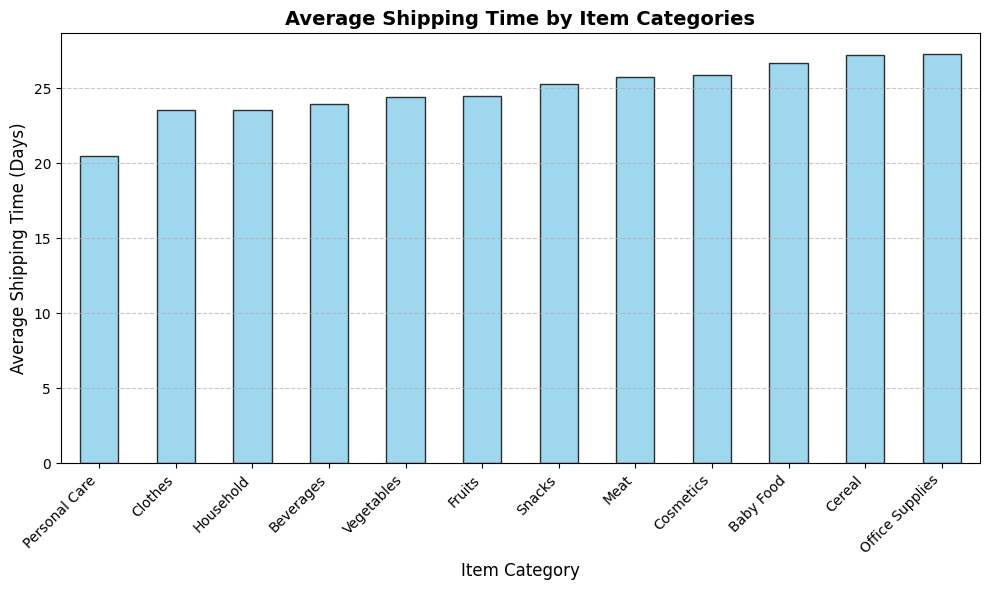

In [ ]:
import matplotlib.pyplot as plt

dataset["Order date"] = pd.to_datetime(dataset["Order date"])
dataset["Ship date"] = pd.to_datetime(dataset["Ship date"])
dataset["Shipping time"] = (dataset["Ship date"] - dataset["Order date"]).dt.days

avg_shipping_time_by_category = dataset.groupby("Item_type")["Shipping time"].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_shipping_time_by_category.plot(kind="bar", color="skyblue", edgecolor="black", alpha=0.8)
plt.title("Average Shipping Time by Item Categories", fontsize=14, fontweight="semibold")
plt.xlabel("Item Category", fontsize=12)
plt.ylabel("Average Shipping Time (Days)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

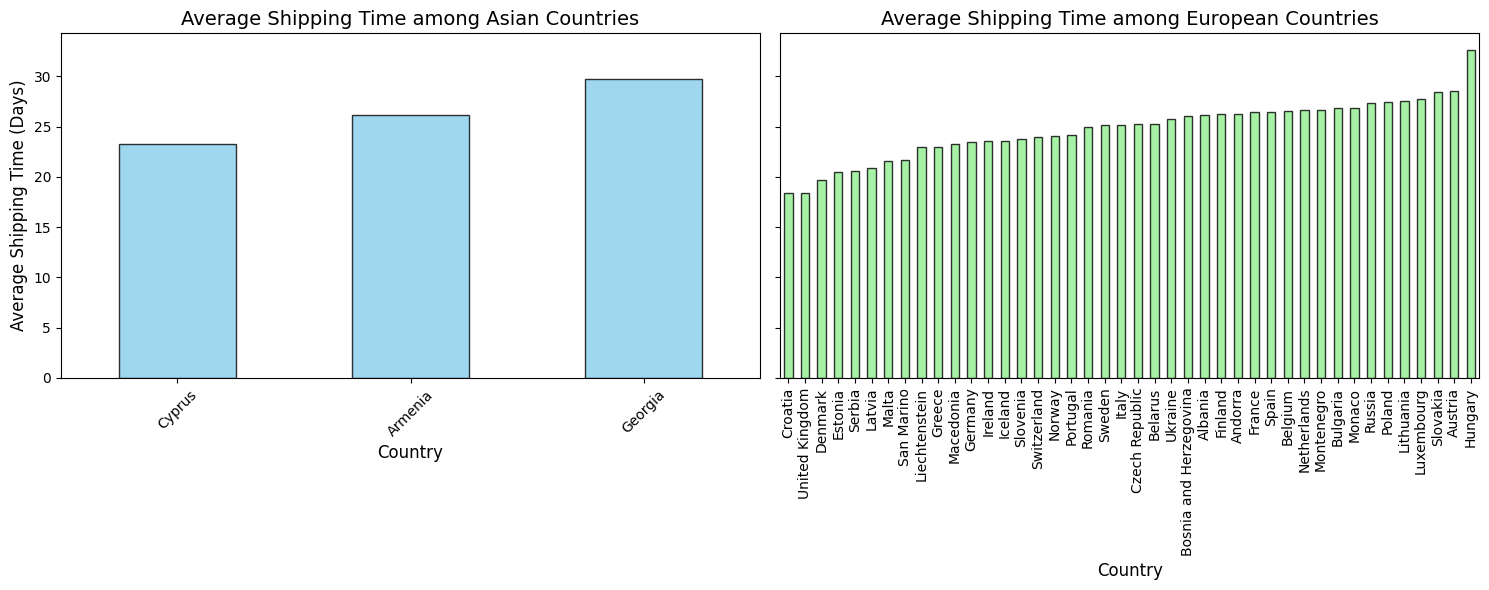

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

avg_shipping_time_by_asia = (
    dataset[dataset["Region"] == "Asia"]
    .groupby("Country name")["Shipping time"]
    .mean()
    .sort_values()
)

avg_shipping_time_by_europe = (
    dataset[dataset["Region"] == "Europe"]
    .groupby("Country name")["Shipping time"]
    .mean()
    .sort_values()
)

fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

avg_shipping_time_by_asia.plot(
    kind="bar", ax=ax[0], color="skyblue", edgecolor="black", alpha=0.8
)
ax[0].set_title("Average Shipping Time among Asian Countries", fontsize=14)
ax[0].set_xlabel("Country", fontsize=12)
ax[0].set_ylabel("Average Shipping Time (Days)", fontsize=12)
ax[0].tick_params(axis="x", rotation=45)

avg_shipping_time_by_europe.plot(
    kind="bar", ax=ax[1], color="lightgreen", edgecolor="black", alpha=0.8
)
ax[1].set_title("Average Shipping Time among European Countries", fontsize=14)
ax[1].set_xlabel("Country", fontsize=12)

plt.tight_layout()
plt.show()



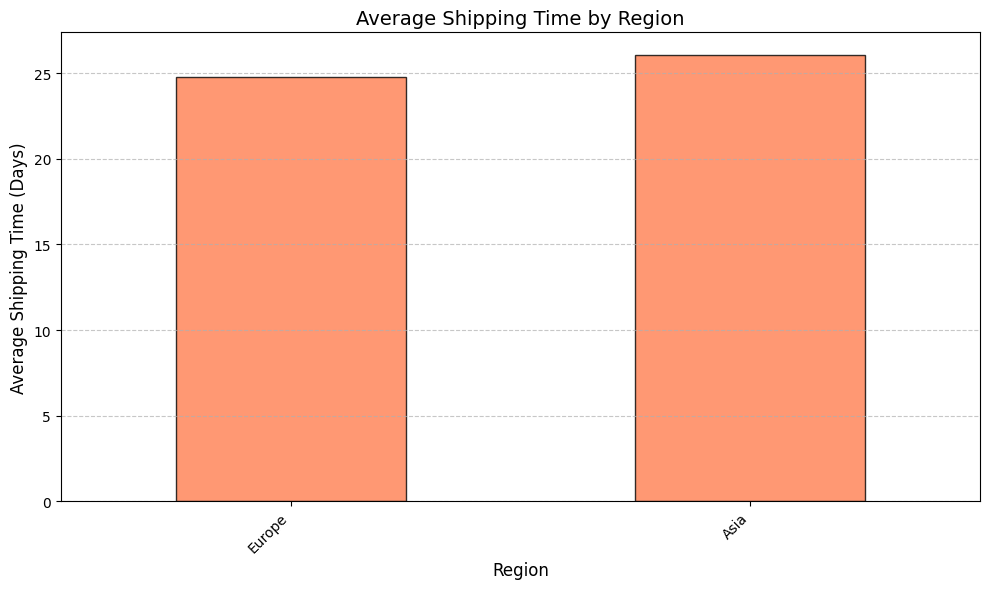

In [ ]:
avg_shipping_time_by_region = dataset.groupby("Region")["Shipping time"].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_shipping_time_by_region.plot(
    kind="bar", color="coral", edgecolor="black", alpha=0.8
)
plt.title("Average Shipping Time by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Average Shipping Time (Days)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()


<ipython-input-44-764e8d1da958>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_shipping_time_by_profit_range = dataset.groupby("Profit Range")["Shipping time"].median()


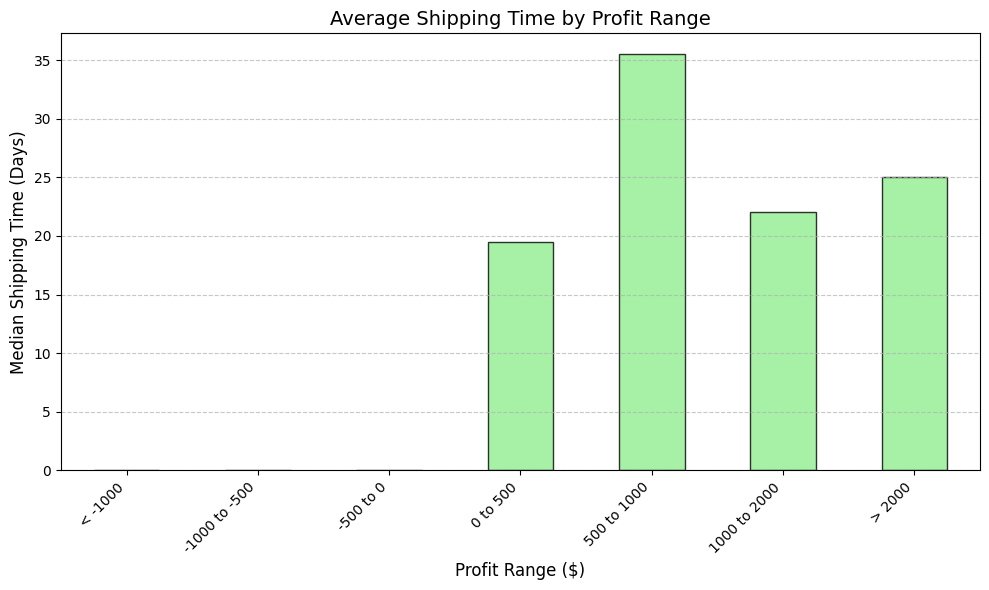

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

bins = [-np.inf, -1000, -500, 0, 500, 1000, 2000, np.inf]
labels = ["< -1000", "-1000 to -500", "-500 to 0", "0 to 500", "500 to 1000", "1000 to 2000", "> 2000"]
dataset["Profit Range"] = pd.cut(dataset["Profit"], bins=bins, labels=labels)

avg_shipping_time_by_profit_range = dataset.groupby("Profit Range")["Shipping time"].median()

plt.figure(figsize=(10, 6))
avg_shipping_time_by_profit_range.plot(kind="bar", color="lightgreen", edgecolor="black", alpha=0.8)
plt.title("Average Shipping Time by Profit Range", fontsize=14)
plt.xlabel("Profit Range ($)", fontsize=12)
plt.ylabel("Median Shipping Time (Days)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


##**Sales Dynamics**

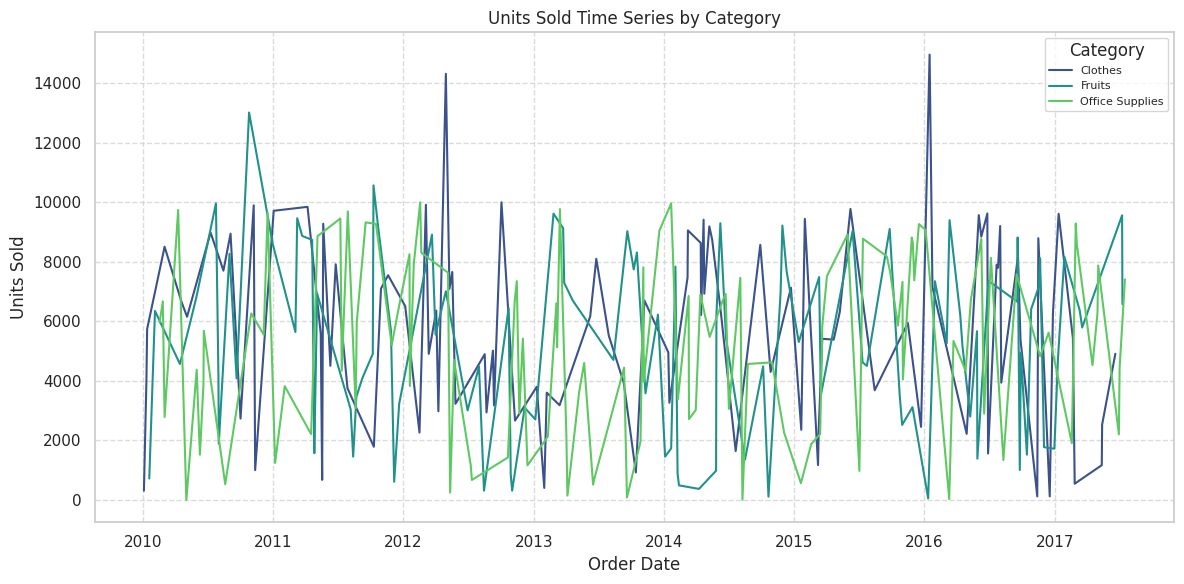

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

top_categories = dataset.groupby("Item_type")["Units sold"].median().nlargest(3)

time_series_data = dataset[dataset["Item_type"].isin(top_categories.index)]
time_series_data = time_series_data.groupby(["Item_type", "Order date"])["Units sold"].sum().reset_index()
time_series_data["Order date"] = pd.to_datetime(time_series_data["Order date"])

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=time_series_data,
    x="Order date",
    y="Units sold",
    hue="Item_type",
    palette="viridis",
)
plt.xlabel("Order Date")
plt.ylabel("Units Sold")
plt.title("Units Sold Time Series by Category")
plt.legend(title="Category", fontsize=8)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()

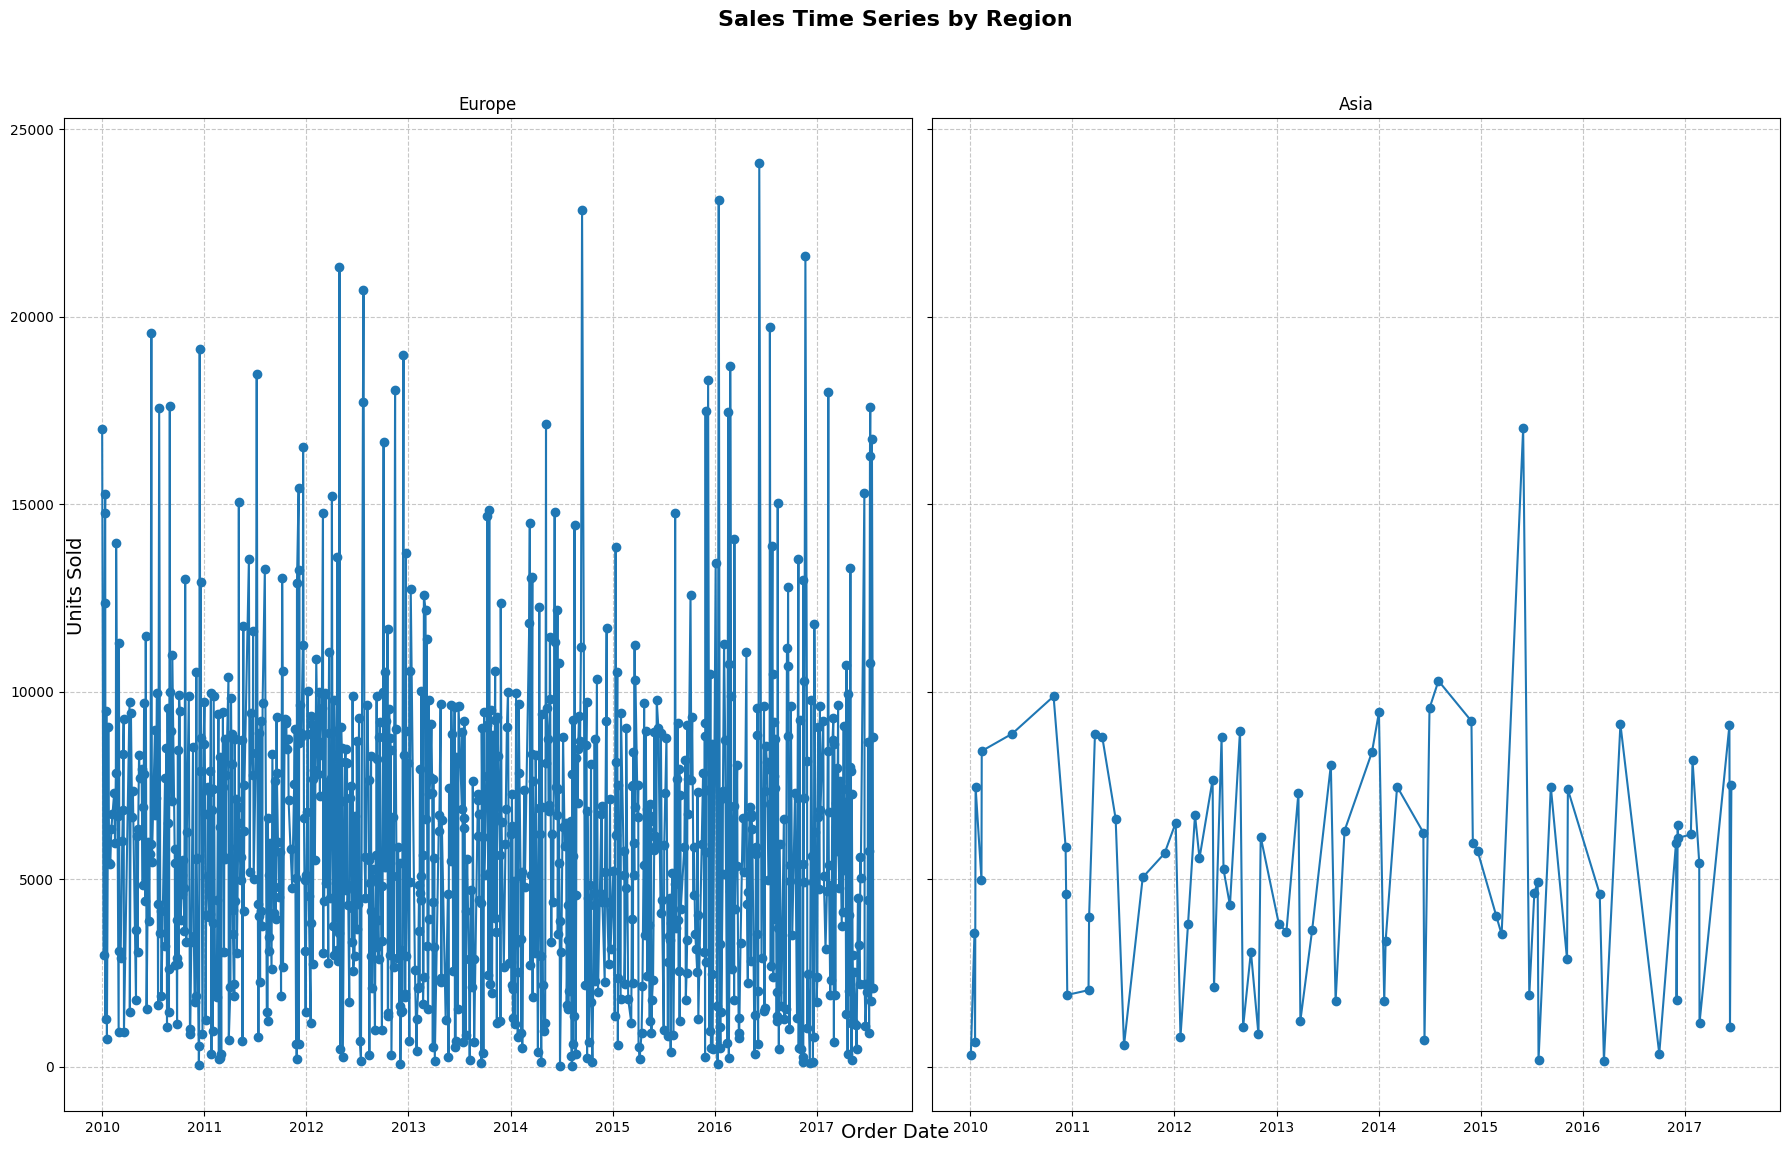

In [ ]:
import matplotlib.pyplot as plt

time_series_data = (
    dataset.groupby(["Region", "Order date"])["Units sold"]
    .sum()
    .reset_index()
)

time_series_data["Order date"] = pd.to_datetime(time_series_data["Order date"])
time_series_data = time_series_data.sort_values(by="Order date")
regions = time_series_data["Region"].unique()
num_regions = len(regions)

fig, axes = plt.subplots(
    nrows=(num_regions // 2) + (num_regions % 2 > 0),
    ncols=2,
    figsize=(18, 12),
    sharex=True,
    sharey=True
)

axes = axes.flatten()

for i, region in enumerate(regions):
    region_data = time_series_data[time_series_data["Region"] == region]
    axes[i].plot(
        region_data["Order date"],
        region_data["Units sold"],
        marker='o',
        linewidth=1.5
    )
    axes[i].set_title(region, fontsize=12)
    axes[i].grid(True, linestyle='--', alpha=0.7)

fig.text(0.5, 0.04, 'Order Date', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Units Sold', va='center', rotation='vertical', fontsize=14)
fig.suptitle("Sales Time Series by Region", fontsize=16, fontweight="bold")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


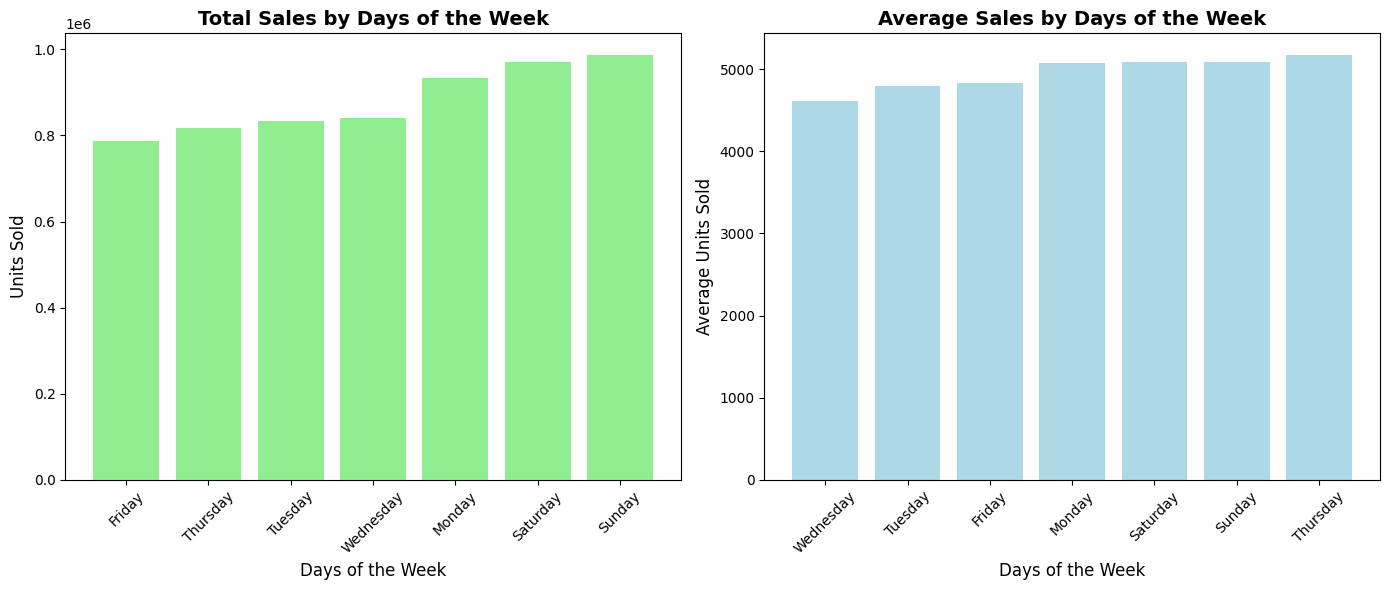

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

dataset["Order date"] = pd.to_datetime(dataset["Order date"])
dataset["day_of_week"] = dataset["Order date"].dt.day_name()

daily_sales_sum = dataset.groupby("day_of_week")["Units sold"].sum().sort_values()
daily_sales_mean = dataset.groupby("day_of_week")["Units sold"].mean().sort_values()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot total sales by day of the week
ax[0].bar(daily_sales_sum.index, daily_sales_sum, color="lightgreen")
ax[0].set_title("Total Sales by Days of the Week", fontsize=14, fontweight="semibold")
ax[0].set_xlabel("Days of the Week", fontsize=12)
ax[0].set_ylabel("Units Sold", fontsize=12)
ax[0].tick_params(axis='x', rotation=45)

# Plot average sales by day of the week
ax[1].bar(daily_sales_mean.index, daily_sales_mean, color="lightblue")
ax[1].set_title("Average Sales by Days of the Week", fontsize=14, fontweight="semibold")
ax[1].set_xlabel("Days of the Week", fontsize=12)
ax[1].set_ylabel("Average Units Sold", fontsize=12)
ax[1].tick_params(axis='x', rotation=45)

# Adjust layout and display
plt.tight_layout()
plt.show()

#**Conclusions**

The decision to analyze *popularity* (number of units sold) and *profitability* as criteria aims to determine if greater popularity leads to higher profits. However, in terms of product categories, popularity does not consistently align with profitability. For example, *Clothes, Fruits, and Office Supplies* rank as the top three most popular items, but the most profitable categories are *Household, Cosmetics, and Office Supplies*. The overlap in *Office Supplies* suggests these products might be priced or marketed differently.

Regarding regions, *Asia surpasses Europe in popularity*, indicating that Asian customers place more orders. However, the profit rate paints the opposite picture, with *Europe being more profitable*. At the country level, this trend continues: Cyprus generates more orders, while Armenia brings higher profits. Notably, in Europe, Hungary leads in both popularity and profitability.

In terms of *sales channels*, offline customers purchase more frequently and contribute the highest profits on average. However, the difference between offline and online orders is not significant.

**Shipping Time Analysis**:
Shipping time, calculated as the difference between the ship date and order date, highlights delivery duration. The categories with the longest shipping times are *Office Supplies, Cereal, and Baby Food*. Among countries, *Georgia* experiences the longest shipping delays, potentially due to logistical challenges or item availability. *Hungary* leads Europe in both shipping time and popularity. Overall, shipping delays are longest in *Asia*.

Shipping time shows some correlation with profitability. Orders generating profits between 500 dollars and 1,000 dollars typically take around 35 days for delivery. Despite this outlier, profit generally increases with longer shipping times.

**Sales Dynamics**:
Sales volume fluctuates over time. *Clothes* sales increased noticeably in 2012 and 2016. *Fruits* sales peaked at the end of 2010. By region, *Europe* saw significant sales surges in 2014 and 2016, while *Asia's* peak sales year was 2015.

When analyzing sales by day of the week, total sales peak on *Sunday*. However, considering average sales, *Thursday* stands out as the most significant day.